In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ihelon_coffee_sales_path = kagglehub.dataset_download('ihelon/coffee-sales')

print('Data source import complete.')


Using Colab cache for faster access to the 'coffee-sales' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales/index_2.csv
/kaggle/input/coffee-sales/index_1.csv


In [ ]:
df = pd.read_csv('/kaggle/input/coffee-sales/index_1.csv')
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 170.6+ KB


In [ ]:
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.dayofweek
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.time
df


,date,datetime,cash_type,card,money,coffee_name,month,day,dayofweek,year,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,4,2024,10:15:50.520000
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:19:22.539000
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:20:18.089000
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,4,2024,13:46:33.006000
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,4,2024,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,3,23,6,2025,10:34:54.894000
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:43:37.362000
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:44:16.864000
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,3,23,6,2025,15:47:28.723000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   month        3636 non-null   int32         
 7   day          3636 non-null   int32         
 8   dayofweek    3636 non-null   int32         
 9   year         3636 non-null   int32         
 10  time         3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(4), object(4)
memory usage: 255.8+ KB


In [ ]:
from datetime import time
def sepday(t):
    if time(5,0) <= t < time(12,0):
        return 'Morning'
    elif time(12,0) <= t < time(17,0):
        return 'Afternoon'
    elif time(17,0) <= t < time(21,0):
        return 'Evening'
    else:
        return 'Night'


df['timeofday'] = df['time'].apply(sepday)
df

,date,datetime,cash_type,card,money,coffee_name,month,day,dayofweek,year,time,timeofday
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,4,2024,10:15:50.520000,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:19:22.539000,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:20:18.089000,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,4,2024,13:46:33.006000,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,4,2024,13:48:14.626000,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,3,23,6,2025,10:34:54.894000,Morning
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:43:37.362000,Afternoon
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:44:16.864000,Afternoon
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,3,23,6,2025,15:47:28.723000,Afternoon


In [ ]:
dailysales = df.groupby('date').sum('money')['money']
dailysales

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,623.56
2025-03-20,597.60
2025-03-21,636.80


<Axes: xlabel='date'>

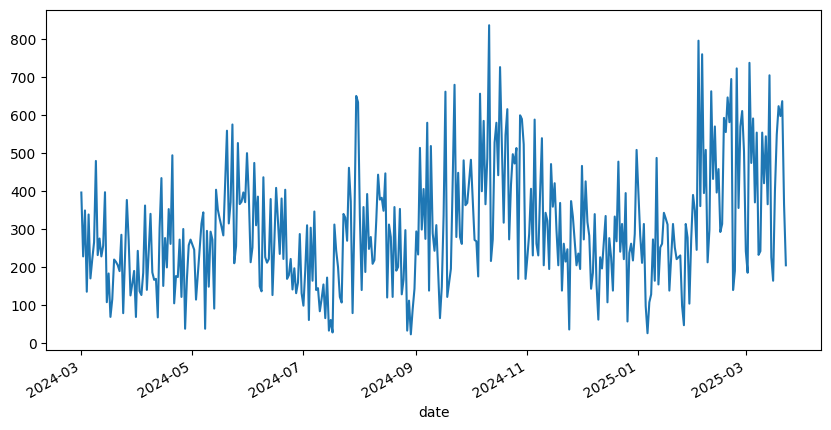

In [ ]:
dailysales.plot(figsize=(10,5))

In [ ]:
monthlysales = df.groupby('month')['money'].sum().reset_index()
monthlysales

,month,money
0,1,6398.86
1,2,13215.48
2,3,17036.64
3,4,6720.56
4,5,9063.42
5,6,7758.76
6,7,6915.94
7,8,7613.84
8,9,9988.64
9,10,13891.16


<Axes: xlabel='month', ylabel='money'>

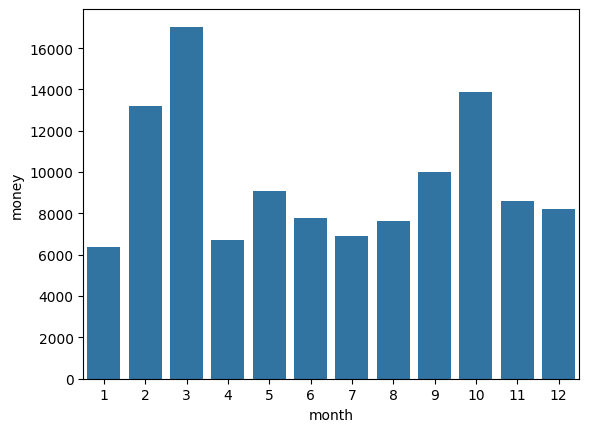

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(monthlysales, x=monthlysales['month'], y = monthlysales['money'])

In [ ]:
weeklysales = df.groupby('dayofweek')['money'].sum().reset_index()
weeklysales

,dayofweek,money
0,0,17925.10
1,1,18637.38
2,2,16093.46
3,3,16477.40
4,4,17257.66
5,5,15182.52
6,6,13858.06


<Axes: xlabel='dayofweek', ylabel='money'>

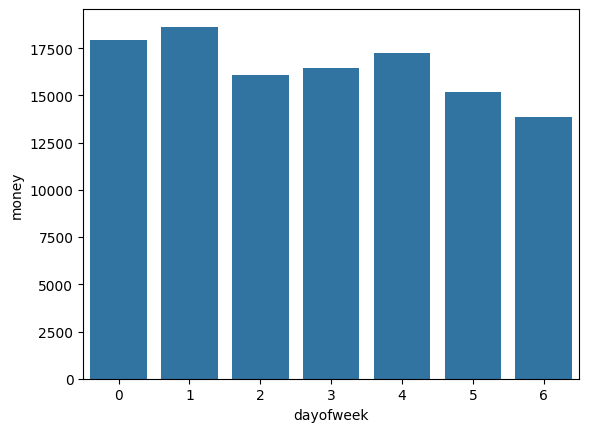

In [ ]:
sns.barplot(weeklysales, x=weeklysales['dayofweek'], y=weeklysales['money'])

<Axes: ylabel='count'>

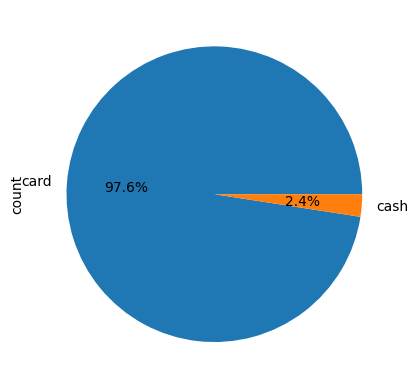

In [ ]:


pay = df['cash_type'].value_counts()
pay.plot.pie(autopct='%1.1f%%')


In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name,month,day,dayofweek,year,time,timeofday
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,4,2024,10:15:50.520000,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:19:22.539000,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:20:18.089000,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,4,2024,13:46:33.006000,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,4,2024,13:48:14.626000,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,3,23,6,2025,10:34:54.894000,Morning
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:43:37.362000,Afternoon
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:44:16.864000,Afternoon
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,3,23,6,2025,15:47:28.723000,Afternoon


In [ ]:
df['coffee_name'].value_counts().reset_index()

,coffee_name,count
0,Americano with Milk,824
1,Latte,782
2,Americano,578
3,Cappuccino,501
4,Cortado,292
5,Hot Chocolate,282
6,Cocoa,243
7,Espresso,134


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano with Milk'),
  Text(1, 0, 'Latte'),
  Text(2, 0, 'Americano'),
  Text(3, 0, 'Cappuccino'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Hot Chocolate'),
  Text(6, 0, 'Cocoa'),
  Text(7, 0, 'Espresso')])

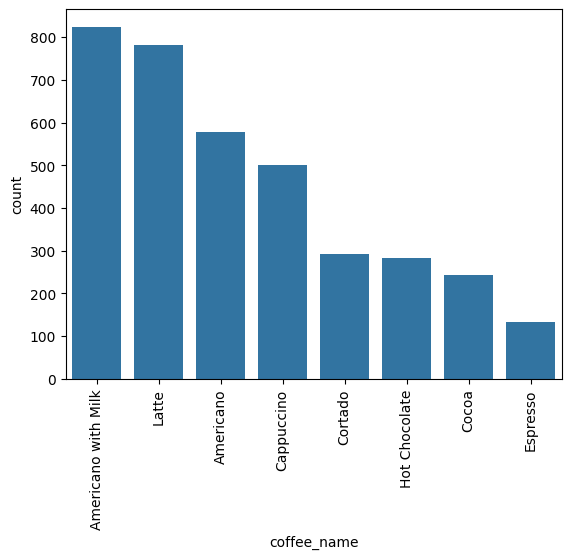

In [ ]:
sns.barplot(df['coffee_name'].value_counts().reset_index(), x='coffee_name', y='count')
plt.xticks(rotation=90)

<Axes: xlabel='timeofday', ylabel='count'>

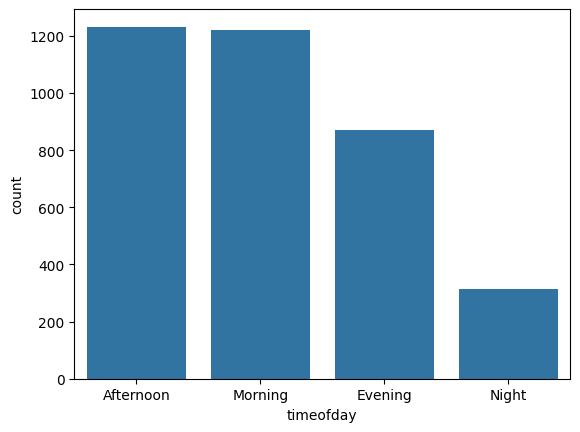

In [ ]:
sns.barplot(df['timeofday'].value_counts().reset_index(), x='timeofday', y='count')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Latte'),
  Text(1, 0, 'Americano with Milk'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Americano'),
  Text(4, 0, 'Hot Chocolate'),
  Text(5, 0, 'Cocoa'),
  Text(6, 0, 'Cortado'),
  Text(7, 0, 'Espresso')])

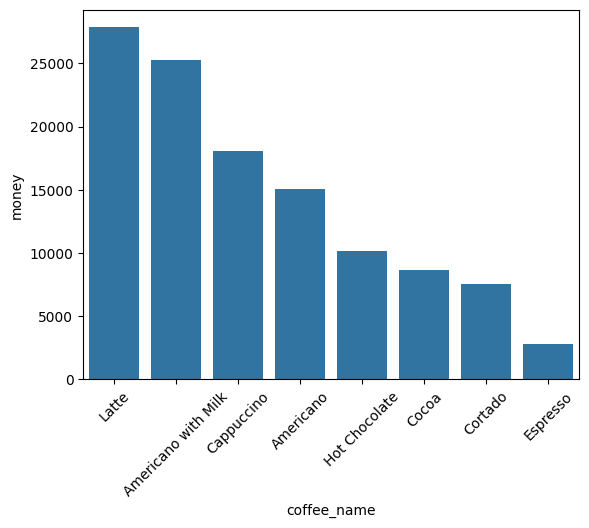

In [ ]:
sns.barplot(df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).reset_index(), x='coffee_name', y='money')
plt.xticks(rotation=45)

In [ ]:
monthlyrev = df.groupby(['month','coffee_name'])['money'].sum().reset_index()
monthlyrev


,month,coffee_name,money
0,1,Americano,649.00
1,1,Americano with Milk,1604.72
2,1,Cappuccino,965.52
3,1,Cocoa,500.64
4,1,Cortado,571.12
...,...,...,...
91,12,Cocoa,750.96
92,12,Cortado,804.76
93,12,Espresso,252.72
94,12,Hot Chocolate,929.76


In [ ]:
monthlyrev['month'] = pd.Categorical(monthlyrev['month'], categories=[1,2,3,4,5,6,7,8,9,10,11,12], ordered=True)
monthlyrev

,month,coffee_name,money
0,1,Americano,649.00
1,1,Americano with Milk,1604.72
2,1,Cappuccino,965.52
3,1,Cocoa,500.64
4,1,Cortado,571.12
...,...,...,...
91,12,Cocoa,750.96
92,12,Cortado,804.76
93,12,Espresso,252.72
94,12,Hot Chocolate,929.76


<Axes: ylabel='money'>

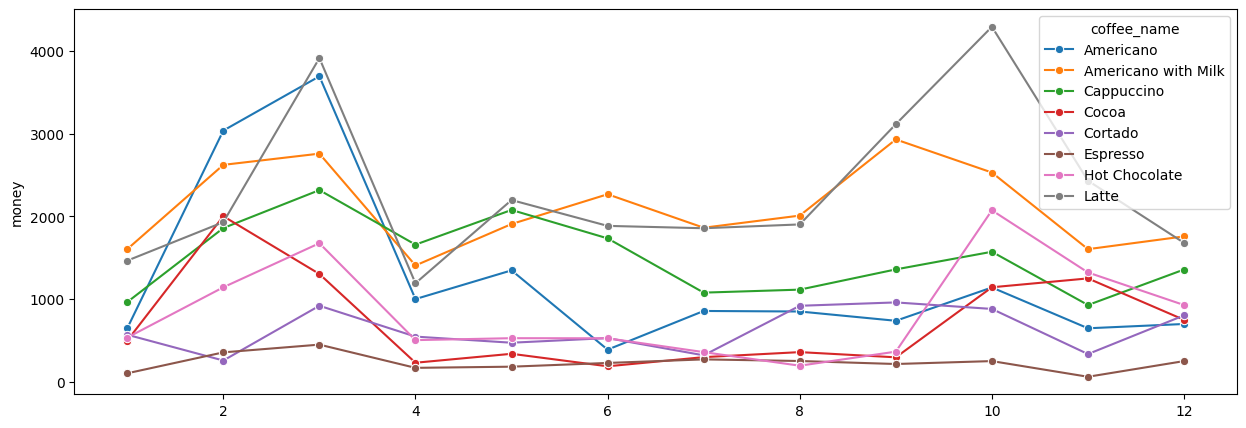

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(monthlyrev, x=pd.Categorical(monthlyrev['month'], ordered=True), y='money', hue='coffee_name', marker='o')
# pd.Categorical(monthlyrev['month'], ordered=True)

In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name,month,day,dayofweek,year,time,timeofday
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,4,2024,10:15:50.520000,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:19:22.539000,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:20:18.089000,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,4,2024,13:46:33.006000,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,4,2024,13:48:14.626000,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,3,23,6,2025,10:34:54.894000,Morning
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:43:37.362000,Afternoon
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:44:16.864000,Afternoon
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,3,23,6,2025,15:47:28.723000,Afternoon


In [ ]:
weeklyrev = df.groupby(['dayofweek', 'coffee_name'])['money'].sum().reset_index()
weeklyrev


,dayofweek,coffee_name,money
0,0,Americano,2568.12
1,0,Americano with Milk,4053.78
2,0,Cappuccino,2676.58
3,0,Cocoa,1205.06
4,0,Cortado,948.40
5,0,Espresso,259.62
6,0,Hot Chocolate,1246.70
7,0,Latte,4966.84
8,1,Americano,2168.62
9,1,Americano with Milk,4436.60


<Axes: ylabel='money'>

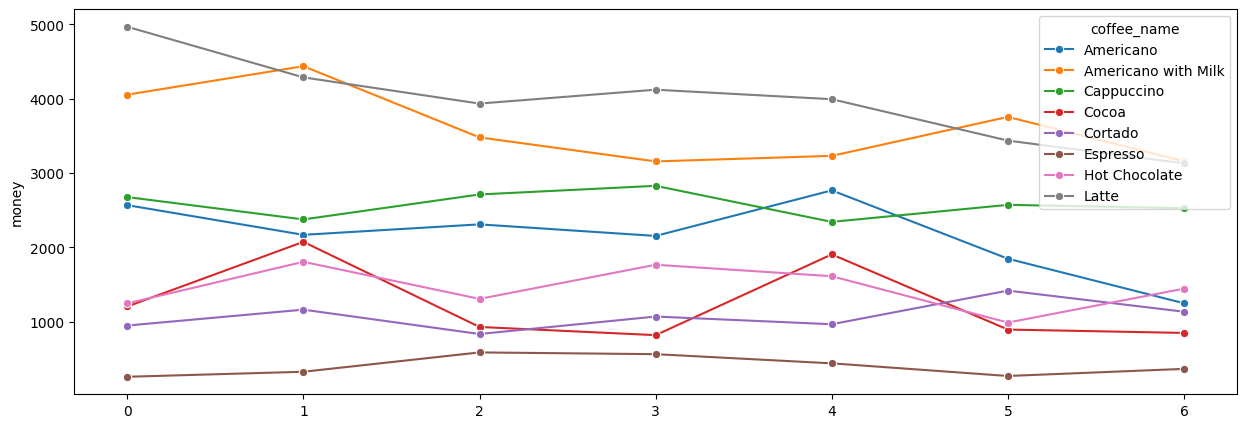

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(weeklyrev, x=pd.Categorical(weeklyrev['dayofweek']), y='money', hue='coffee_name', marker='o')


In [ ]:
dailyrev = df.groupby(['timeofday', 'coffee_name'])['money'].sum().reset_index()
dailyrev

,timeofday,coffee_name,money
0,Afternoon,Americano,6308.94
1,Afternoon,Americano with Milk,7557.36
2,Afternoon,Cappuccino,6110.70
3,Afternoon,Cocoa,2761.68
4,Afternoon,Cortado,2405.84
5,Afternoon,Espresso,1239.16
6,Afternoon,Hot Chocolate,2979.02
7,Afternoon,Latte,9691.10
8,Evening,Americano,2337.62
9,Evening,Americano with Milk,5097.22


<Axes: xlabel='timeofday', ylabel='money'>

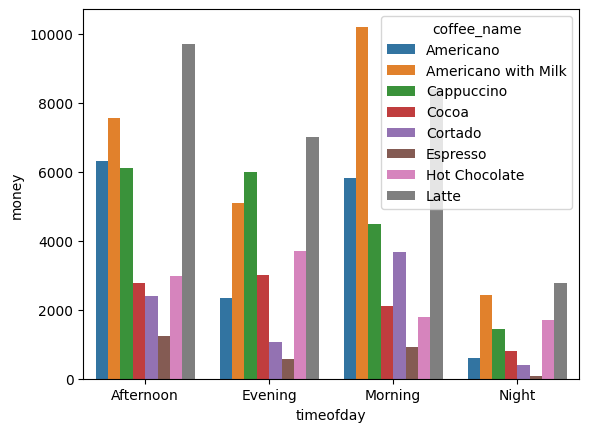

In [ ]:
sns.barplot(dailyrev, x='timeofday', y='money', hue='coffee_name')

In [ ]:
daymonthtraffic = df.groupby(['month', 'timeofday']).size().reset_index(name='count')
daymonthtraffic

,month,timeofday,count
0,1,Afternoon,75
1,1,Evening,44
2,1,Morning,61
3,1,Night,21
4,2,Afternoon,176
5,2,Evening,125
6,2,Morning,118
7,2,Night,4
8,3,Afternoon,225
9,3,Evening,113


<Axes: xlabel='timeofday', ylabel='month'>

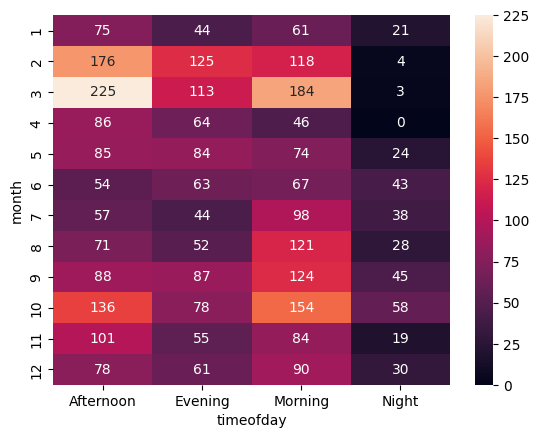

In [ ]:

sns.heatmap(daymonthtraffic.pivot(index='month', columns='timeofday', values='count').fillna(0), annot=True, fmt='g')

# Chronos LLM For Forecasting

In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


In [ ]:

df = df.groupby('date')['money'].sum().reset_index()
df

,date,money
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
376,2025-03-19,623.56
377,2025-03-20,597.60
378,2025-03-21,636.80
379,2025-03-22,365.42


In [ ]:
df = df.set_index('date')
df

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,623.56
2025-03-20,597.60
2025-03-21,636.80


In [ ]:
df['money']

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,623.56
2025-03-20,597.60
2025-03-21,636.80


In [ ]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git


/tmp/ipython-input-2799143959.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(df['money'])


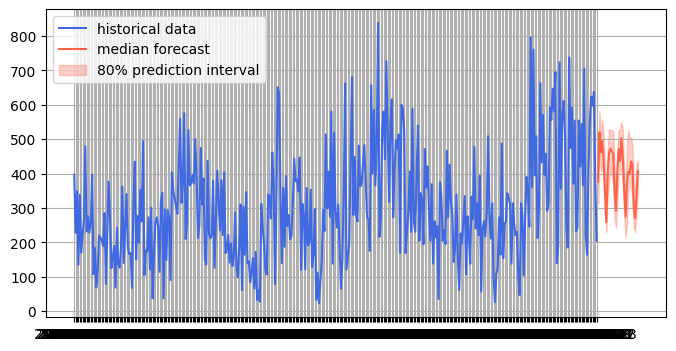

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)



context = torch.tensor(df['money'])
prediction_length = 30
forecast = pipeline.predict(context, prediction_length)



forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)


plt.figure(figsize=(8, 4))
plt.plot(df['money'], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


# **XGBOOST for Forecasting**

In [ ]:
ds = df.copy()
ds

,date,datetime,cash_type,card,money,coffee_name,month,day,dayofweek,year,time,timeofday
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,4,2024,10:15:50.520000,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:19:22.539000,Afternoon
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,4,2024,12:20:18.089000,Afternoon
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,4,2024,13:46:33.006000,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,4,2024,13:48:14.626000,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,3,23,6,2025,10:34:54.894000,Morning
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:43:37.362000,Afternoon
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,6,2025,14:44:16.864000,Afternoon
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,3,23,6,2025,15:47:28.723000,Afternoon


In [ ]:
x = df.groupby('date').agg(money=('money', 'sum'))
x

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,623.56
2025-03-20,597.60
2025-03-21,636.80


In [ ]:
x = ds.groupby(['date', 'month', 'day', 'dayofweek', 'year']).agg(money=('money', 'sum')).reset_index()
x = x.set_index('date')
x
# x.concat(x, )

,month,day,dayofweek,year,money
date,,,,,
2024-03-01,3,1,4,2024,396.30
2024-03-02,3,2,5,2024,228.10
2024-03-03,3,3,6,2024,349.10
2024-03-04,3,4,0,2024,135.20
2024-03-05,3,5,1,2024,338.50
...,...,...,...,...,...
2025-03-19,3,19,2,2025,623.56
2025-03-20,3,20,3,2025,597.60
2025-03-21,3,21,4,2025,636.80


In [ ]:
x['lag1'] = x['money'].shift(30)
x['lag2'] = x['money'].shift(60)
x['lag3'] = x['money'].shift(90)
x

,month,day,dayofweek,year,money,lag1,lag2,lag3
date,,,,,,,,
2024-03-01,3,1,4,2024,396.30,NaN,NaN,NaN
2024-03-02,3,2,5,2024,228.10,NaN,NaN,NaN
2024-03-03,3,3,6,2024,349.10,NaN,NaN,NaN
2024-03-04,3,4,0,2024,135.20,NaN,NaN,NaN
2024-03-05,3,5,1,2024,338.50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-03-19,3,19,2,2025,623.56,592.70,328.20,276.28
2025-03-20,3,20,3,2025,597.60,555.48,312.04,225.82
2025-03-21,3,21,4,2025,636.80,646.60,138.14,138.14


In [ ]:
y = x['money']
x = x.drop('money', axis=1)

In [ ]:
y

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,623.56
2025-03-20,597.60
2025-03-21,636.80


In [ ]:
x

,month,day,dayofweek,year,lag1,lag2,lag3
date,,,,,,,
2024-03-01,3,1,4,2024,NaN,NaN,NaN
2024-03-02,3,2,5,2024,NaN,NaN,NaN
2024-03-03,3,3,6,2024,NaN,NaN,NaN
2024-03-04,3,4,0,2024,NaN,NaN,NaN
2024-03-05,3,5,1,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-03-19,3,19,2,2025,592.70,328.20,276.28
2025-03-20,3,20,3,2025,555.48,312.04,225.82
2025-03-21,3,21,4,2025,646.60,138.14,138.14


In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=500)
model.fit(x, y, eval_set=[(x,y)], verbose=50)



[0]	validation_0-rmse:133.97908
[50]	validation_0-rmse:12.88053
[100]	validation_0-rmse:1.86585
[150]	validation_0-rmse:0.26050
[200]	validation_0-rmse:0.04346
[250]	validation_0-rmse:0.01041
[300]	validation_0-rmse:0.00238
[350]	validation_0-rmse:0.00238
[400]	validation_0-rmse:0.00238
[450]	validation_0-rmse:0.00238
[499]	validation_0-rmse:0.00238


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
x.index.max()

Timestamp('2025-03-23 00:00:00')

In [ ]:
test = pd.DataFrame(index=pd.date_range('2025-03-23', '2025-04-23'))

test['future'] = True
futtest = ds.groupby(['date', 'month', 'day', 'dayofweek', 'year']).agg(money=('money', 'sum')).reset_index().set_index('date')
futtest['future'] = False
futtest = pd.concat([futtest, test])

futtest

,month,day,dayofweek,year,money,future
2024-03-01,3.0,1.0,4.0,2024.0,396.3,False
2024-03-02,3.0,2.0,5.0,2024.0,228.1,False
2024-03-03,3.0,3.0,6.0,2024.0,349.1,False
2024-03-04,3.0,4.0,0.0,2024.0,135.2,False
2024-03-05,3.0,5.0,1.0,2024.0,338.5,False
...,...,...,...,...,...,...
2025-04-19,NaN,NaN,NaN,NaN,NaN,True
2025-04-20,NaN,NaN,NaN,NaN,NaN,True
2025-04-21,NaN,NaN,NaN,NaN,NaN,True
2025-04-22,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
futtest = futtest.reset_index()
futtest['month'] = futtest['index'].dt.month
futtest['day'] = futtest['index'].dt.day
futtest['dayofweek'] = futtest['index'].dt.dayofweek
futtest['year'] = futtest['index'].dt.year
futtest

,index,month,day,dayofweek,year,money,future
0,2024-03-01,3,1,4,2024,396.3,False
1,2024-03-02,3,2,5,2024,228.1,False
2,2024-03-03,3,3,6,2024,349.1,False
3,2024-03-04,3,4,0,2024,135.2,False
4,2024-03-05,3,5,1,2024,338.5,False
...,...,...,...,...,...,...,...
408,2025-04-19,4,19,5,2025,NaN,True
409,2025-04-20,4,20,6,2025,NaN,True
410,2025-04-21,4,21,0,2025,NaN,True
411,2025-04-22,4,22,1,2025,NaN,True


In [ ]:
futtest['lag1'] = futtest['money'].shift(30)
futtest['lag2'] = futtest['money'].shift(60)
futtest['lag3'] = futtest['money'].shift(90)
futtest

,index,month,day,dayofweek,year,money,future,lag1,lag2,lag3
0,2024-03-01,3,1,4,2024,396.3,False,NaN,NaN,NaN
1,2024-03-02,3,2,5,2024,228.1,False,NaN,NaN,NaN
2,2024-03-03,3,3,6,2024,349.1,False,NaN,NaN,NaN
3,2024-03-04,3,4,0,2024,135.2,False,NaN,NaN,NaN
4,2024-03-05,3,5,1,2024,338.5,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
408,2025-04-19,4,19,5,2025,NaN,True,636.80,646.60,138.14
409,2025-04-20,4,20,6,2025,NaN,True,365.42,581.44,313.50
410,2025-04-21,4,21,0,2025,NaN,True,204.76,695.08,251.78
411,2025-04-22,4,22,1,2025,NaN,True,NaN,139.60,220.92


In [ ]:
futtest = futtest.set_index('index')
futtest

,month,day,dayofweek,year,money,future,lag1,lag2,lag3
index,,,,,,,,,
2024-03-01,3,1,4,2024,396.3,False,NaN,NaN,NaN
2024-03-02,3,2,5,2024,228.1,False,NaN,NaN,NaN
2024-03-03,3,3,6,2024,349.1,False,NaN,NaN,NaN
2024-03-04,3,4,0,2024,135.2,False,NaN,NaN,NaN
2024-03-05,3,5,1,2024,338.5,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-04-19,4,19,5,2025,NaN,True,636.80,646.60,138.14
2025-04-20,4,20,6,2025,NaN,True,365.42,581.44,313.50
2025-04-21,4,21,0,2025,NaN,True,204.76,695.08,251.78


In [ ]:
futtest = futtest.drop('money', axis=1)
futtest = futtest.drop('future', axis=1)
futtest

,month,day,dayofweek,year,lag1,lag2,lag3
index,,,,,,,
2024-03-01,3,1,4,2024,NaN,NaN,NaN
2024-03-02,3,2,5,2024,NaN,NaN,NaN
2024-03-03,3,3,6,2024,NaN,NaN,NaN
2024-03-04,3,4,0,2024,NaN,NaN,NaN
2024-03-05,3,5,1,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-04-19,4,19,5,2025,636.80,646.60,138.14
2025-04-20,4,20,6,2025,365.42,581.44,313.50
2025-04-21,4,21,0,2025,204.76,695.08,251.78


In [ ]:
futtest['preds'] = model.predict(futtest)
futtest['preds']

,preds
index,
2024-03-01,396.297211
2024-03-02,228.104858
2024-03-03,349.096252
2024-03-04,135.202179
2024-03-05,338.493469
...,...
2025-04-19,390.049988
2025-04-20,167.508163
2025-04-21,312.653992


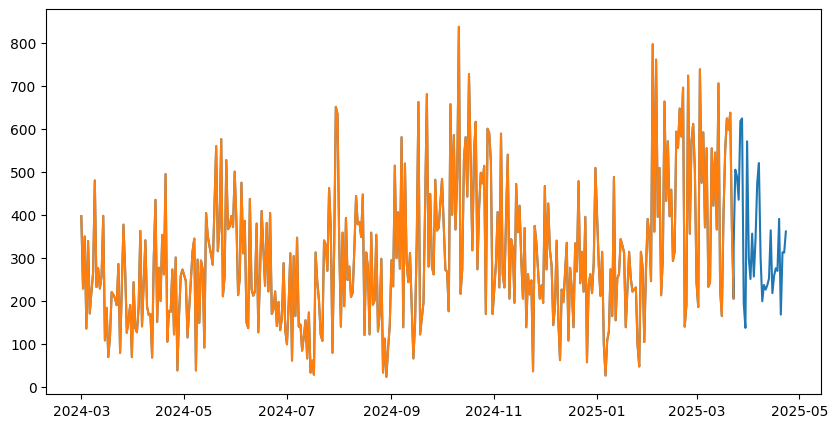

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(futtest['preds'])
plt.plot(dailysales)


# Predict with Deep Learning Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [ ]:
deepdata = ds.groupby(['date', 'month', 'day', 'dayofweek', 'year']).agg(money=('money', 'sum')).reset_index().drop('date', axis=1)
deepdata

,month,day,dayofweek,year,money
0,3,1,4,2024,396.30
1,3,2,5,2024,228.10
2,3,3,6,2024,349.10
3,3,4,0,2024,135.20
4,3,5,1,2024,338.50
...,...,...,...,...,...
376,3,19,2,2025,623.56
377,3,20,3,2025,597.60
378,3,21,4,2025,636.80
379,3,22,5,2025,365.42


In [ ]:
deepy = deepdata['money']
deepx = deepdata.drop('money', axis=1)
deepy

,money
0,396.30
1,228.10
2,349.10
3,135.20
4,338.50
...,...
376,623.56
377,597.60
378,636.80
379,365.42


In [ ]:
deepy = deepy.reset_index()
deepy['lag1'] = deepdata['money'].shift(1)
deepy['lag2'] = deepdata['money'].shift(2)
deepy['lag3'] = deepdata['money'].shift(3)
deepy['lag4'] = deepdata['money'].shift(4)
deepy['lag5'] = deepdata['money'].shift(5)
deepy['lag6'] = deepdata['money'].shift(6)
deepy['lag7'] = deepdata['money'].shift(7)

In [ ]:
deepy

,index,money,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,0,396.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,228.10,396.30,NaN,NaN,NaN,NaN,NaN,NaN
2,2,349.10,228.10,396.30,NaN,NaN,NaN,NaN,NaN
3,3,135.20,349.10,228.10,396.30,NaN,NaN,NaN,NaN
4,4,338.50,135.20,349.10,228.10,396.30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
376,376,623.56,549.12,401.18,164.10,225.82,704.88,365.42,544.22
377,377,597.60,623.56,549.12,401.18,164.10,225.82,704.88,365.42
378,378,636.80,597.60,623.56,549.12,401.18,164.10,225.82,704.88
379,379,365.42,636.80,597.60,623.56,549.12,401.18,164.10,225.82


In [ ]:
deepy.interpolate(axis=1)

,index,money,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,0.0,396.30,396.30,396.30,396.30,396.30,396.30,396.30,396.30
1,1.0,228.10,396.30,396.30,396.30,396.30,396.30,396.30,396.30
2,2.0,349.10,228.10,396.30,396.30,396.30,396.30,396.30,396.30
3,3.0,135.20,349.10,228.10,396.30,396.30,396.30,396.30,396.30
4,4.0,338.50,135.20,349.10,228.10,396.30,396.30,396.30,396.30
...,...,...,...,...,...,...,...,...,...
376,376.0,623.56,549.12,401.18,164.10,225.82,704.88,365.42,544.22
377,377.0,597.60,623.56,549.12,401.18,164.10,225.82,704.88,365.42
378,378.0,636.80,597.60,623.56,549.12,401.18,164.10,225.82,704.88
379,379.0,365.42,636.80,597.60,623.56,549.12,401.18,164.10,225.82


In [ ]:
deepy = deepy.dropna().drop('index', axis=1)
deepy

,money,lag1,lag2,lag3,lag4,lag5,lag6,lag7
7,265.50,220.10,170.20,338.50,135.20,349.10,228.10,396.30
8,479.40,265.50,220.10,170.20,338.50,135.20,349.10,228.10
9,231.60,479.40,265.50,220.10,170.20,338.50,135.20,349.10
10,275.20,231.60,479.40,265.50,220.10,170.20,338.50,135.20
11,228.10,275.20,231.60,479.40,265.50,220.10,170.20,338.50
...,...,...,...,...,...,...,...,...
376,623.56,549.12,401.18,164.10,225.82,704.88,365.42,544.22
377,597.60,623.56,549.12,401.18,164.10,225.82,704.88,365.42
378,636.80,597.60,623.56,549.12,401.18,164.10,225.82,704.88
379,365.42,636.80,597.60,623.56,549.12,401.18,164.10,225.82


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaledeepy = scaler.fit_transform(deepy.values)

scaledeepy

array([[0.29801878, 0.24222015, 0.18089081, ..., 0.40076692, 0.2520525 ,
        0.45877784],
       [0.56091146, 0.29801878, 0.24222015, ..., 0.13787424, 0.40076692,
        0.2520525 ],
       [0.25635416, 0.56091146, 0.29801878, ..., 0.38773905, 0.13787424,
        0.40076692],
       ...,
       [0.75436311, 0.70618455, 0.73809056, ..., 0.17339364, 0.24925028,
        0.83803648],
       [0.42082493, 0.75436311, 0.70618455, ..., 0.46477558, 0.17339364,
        0.24925028],
       [0.2233666 , 0.42082493, 0.75436311, ..., 0.64660046, 0.46477558,
        0.17339364]])

In [ ]:
nn.Embedding(8,16)(torch.tensor(scaledeepy[0], dtype=torch.long)).size()

torch.Size([8, 16])

In [ ]:
x = scaledeepy[:, 1:]
y = scaledeepy[:, 0]

In [ ]:
y

array([0.29801878, 0.56091146, 0.25635416, 0.30994051, 0.2520525 ,
       0.28658866, 0.45976107, 0.10395261, 0.19686839, 0.05638857,
       0.11378497, 0.24197434, 0.23460007, 0.22390738, 0.20448847,
       0.32210806, 0.06843321, 0.2465218 , 0.43468856, 0.30563886,
       0.12582961, 0.16356128, 0.20510299, 0.05614277, 0.27011946,
       0.139472  , 0.12718155, 0.19908067, 0.41674451, 0.14389656,
       0.2685217 , 0.38982843, 0.20043262, 0.17622044, 0.17941596,
       0.05479082, 0.34337053, 0.50548154, 0.15655572, 0.31153827,
       0.21653311, 0.40519149, 0.29261098, 0.57922423, 0.10031464,
       0.18858463, 0.18543828, 0.30645003, 0.12101175, 0.34076496,
       0.01806696, 0.17941596, 0.28838307, 0.30645003, 0.27370827,
       0.11235927, 0.3583403 , 0.39459712, 0.01806696, 0.33474264,
       0.1541468 , 0.33211248, 0.30645003, 0.08332924, 0.46779903,
       0.40288088, 0.37402291, 0.34823755, 0.32006784, 0.48525146,
       0.65876801, 0.35873359, 0.42746178, 0.67889976, 0.22997

In [ ]:
class timeDS(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

  def __len__(self):
    return len(self.x)


In [ ]:
class DNN(nn.Module):
  def __init__(self, num_feature=7, emb_dim=32, hidden_dim=100, dropout_rate=0.2, output_dim=1):
    super(DNN, self).__init__()
    # self.emb = nn.Embedding(num_feature, emb_dim)
    self.rnn = nn.LSTM(num_feature, hidden_dim, dropout=dropout_rate, batch_first=True)
    self.output = nn.Linear(hidden_dim, output_dim)


  def forward(self, x):
    # x = self.emb(x)
    o, (h, c) = self.rnn(x)
    x = self.output(h[-1])
    return x




In [ ]:
model = DNN()
model

DNN(
  (rnn): LSTM(7, 100, batch_first=True, dropout=0.2)
  (output): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

traind = timeDS(xtrain, ytrain)
testd = timeDS(xtest, ytest)

trainload = DataLoader(traind, batch_size=32, shuffle=True)
testload = DataLoader(testd, batch_size=32, shuffle=True)

iters = 5

In [ ]:
def train(model, epochs=5):
  model.train()
  losses = []
  for epoch in range(epochs):
    for x, y in trainload:
      optimizer.zero_grad()
      pred = model(x)
      los = loss(pred.type(torch.float32), y.type(torch.float32))
      los.backward()
      optimizer.step()
      losses.append(los.item())

    print(f"Epoch: {epoch}  Loss: {np.mean(losses)}")



In [ ]:
train(model, epochs=1)

Epoch: 0  Loss: 0.11859412656890021


In [ ]:
def evaluate(model):
  plt.figure()
  model.eval()
  losses = []
  preds = np.array([])
  with torch.no_grad():
    for x, y in testload:
      pred = model(x)
      los = loss(pred.type(torch.float32), y.type(torch.float32))
      losses.append(los)
      preds = np.append(preds, np.array(pred))

  print(f"Loss: {np.mean(losses)}")
  return preds

In [ ]:
ans = evaluate(model)

Loss: 0.15862175822257996


<Figure size 640x480 with 0 Axes>

In [ ]:
ans


array([0.03264769, 0.05238705, 0.04481076, 0.04956461])

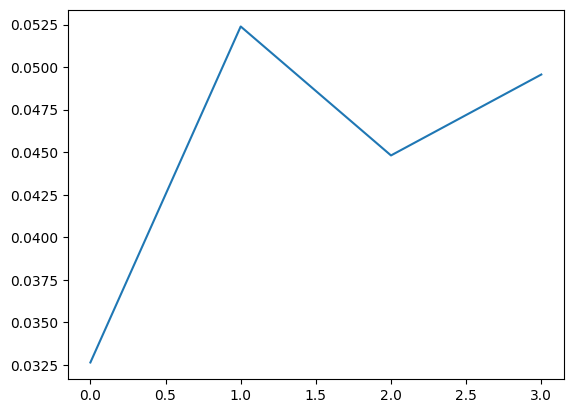

In [ ]:
plt.plot(ans.flatten())


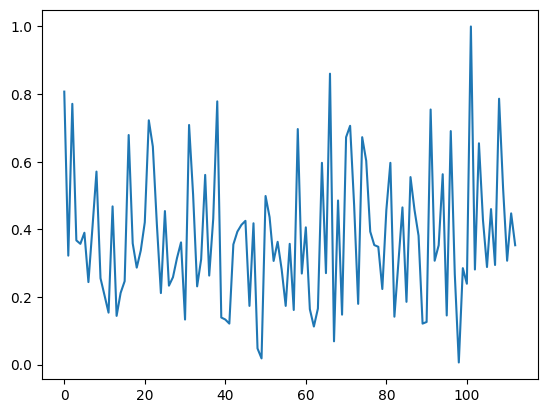

In [ ]:
plt.plot(ytest)